In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('Uberdata.csv')
data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [29]:
data.shape

(1156, 7)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [31]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [32]:
data = data.rename({'START_DATE*':'startdate', 
                    'END_DATE*':'enddate', 'CATEGORY*':'category', 
                    'START*':'start', 'STOP*':'stop', 'MILES*':'miles', 'PURPOSE*':'purpose'}, axis=1)
data.columns

Index(['startdate', 'enddate', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

In [33]:
data

,startdate,enddate,category,start,stop,miles,purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [34]:
data.isna().sum()

startdate      0
enddate        1
category       1
start          1
stop           1
miles          0
purpose      503
dtype: int64

In [35]:
data[data.enddate.isna()]

,startdate,enddate,category,start,stop,miles,purpose
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [36]:
data = data.drop(1155)

In [37]:
data.isna().sum()

startdate      0
enddate        0
category       0
start          0
stop           0
miles          0
purpose      502
dtype: int64

In [38]:
data.category.value_counts()

Business    1078
Personal      77
Name: category, dtype: int64

In [39]:
print('Business: ', round(data[data['category'] == 'Business'].miles.mean(),3))
print('Personal: ', round(data[data['category'] == 'Personal'].miles.mean(),3))
print('Meal/Entertain: ', round(data[data['purpose'] == 'Meal/Entertain'].miles.mean(),3))

Business:  10.656
Personal:  9.321
Meal/Entertain:  5.698


In [40]:
data.startdate.dtypes

dtype('O')

In [41]:
data.startdate = pd.to_datetime(data.startdate)
data.enddate = pd.to_datetime(data.enddate)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   startdate  1155 non-null   datetime64[ns]
 1   enddate    1155 non-null   datetime64[ns]
 2   category   1155 non-null   object        
 3   start      1155 non-null   object        
 4   stop       1155 non-null   object        
 5   miles      1155 non-null   float64       
 6   purpose    653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [42]:
data['minutes'] = (data['enddate'] - data['startdate']).dt.total_seconds()/60
data['year'] = data.startdate.dt.year
data['month'] = data.startdate.dt.month
data['week'] = data.startdate.dt.isocalendar().week
data['hour'] = data.startdate.dt.hour
data.head()

,startdate,enddate,category,start,stop,miles,purpose,minutes,year,month,week,hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,2016,1,53,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,2016,1,53,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,2016,1,53,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,2016,1,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,2016,1,1,14


In [43]:
print("Sorted Week\n\n", data['week'].sort_values().unique() )
print("\n\nSorted Month\n\n", data['month'].sort_values().unique() )
print("\n\nSorted Hours\n\n", data['hour'].sort_values().unique() )

Sorted Week

 <IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Length: 53, dtype: UInt32


Sorted Month

 [ 1  2  3  4  5  6  7  8  9 10 11 12]


Sorted Hours

 [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [44]:
print('\n------- Travel Time --------\n')
print("Maximum Travel Time: ", round(data.minutes.max(),3) )
print("Minimum Travel Time: ", round(data.minutes.min(),3) )
print("Mean of Travel Time: ", round(data.minutes.mean(),3) )


------- Travel Time --------

Maximum Travel Time:  336.0
Minimum Travel Time:  0.0
Mean of Travel Time:  23.243


In [45]:
print('\n------- Average Miles of Ride Category Wise --------\n', 
      round(data.groupby(['category'])['miles'].mean(), 3) )

print('\n------- Average Miles of Ride Puepose Wise --------\n', 
      round(data.groupby(['purpose'])['miles'].mean(), 3) )


------- Average Miles of Ride Category Wise --------
 category
Business    10.656
Personal     9.321
Name: miles, dtype: float64

------- Average Miles of Ride Puepose Wise --------
 purpose
Airport/Travel       5.500
Between Offices     10.944
Charity ($)         15.100
Commute            180.200
Customer Visit      20.688
Errand/Supplies      3.969
Meal/Entertain       5.698
Meeting             15.248
Moving               4.550
Temporary Site      10.474
Name: miles, dtype: float64


In [46]:
data[data.start.str.contains('\?') == True]

,startdate,enddate,category,start,stop,miles,purpose,minutes,year,month,week,hour
140,2016-02-20 14:50:00,2016-02-20 15:54:00,Business,R?walpindi,R?walpindi,23.1,Meeting,64.0,2016,2,7,14
141,2016-02-20 16:59:00,2016-02-20 17:54:00,Personal,R?walpindi,Unknown Location,16.5,NaN,55.0,2016,2,7,16
656,2016-08-15 09:05:00,2016-08-15 09:52:00,Business,R?walpindi,Unknown Location,15.6,NaN,47.0,2016,8,33,9
670,2016-08-17 15:32:00,2016-08-17 15:47:00,Business,R?walpindi,Islamabad,6.4,NaN,15.0,2016,8,33,15
679,2016-08-19 10:57:00,2016-08-19 11:06:00,Business,R?walpindi,Unknown Location,2.0,NaN,9.0,2016,8,33,10
696,2016-08-22 20:53:00,2016-08-22 21:31:00,Business,R?walpindi,R?walpindi,4.1,NaN,38.0,2016,8,34,20
697,2016-08-22 22:31:00,2016-08-22 23:00:00,Business,R?walpindi,Unknown Location,18.7,NaN,29.0,2016,8,34,22
763,2016-09-19 06:18:00,2016-09-19 06:49:00,Business,R?walpindi,Unknown Location,18.2,NaN,31.0,2016,9,38,6
788,2016-10-06 17:23:00,2016-10-06 17:40:00,Business,R?walpindi,Unknown Location,112.6,NaN,17.0,2016,10,40,17
804,2016-10-12 19:18:00,2016-10-12 19:21:00,Business,R?walpindi,Unknown Location,18.4,NaN,3.0,2016,10,41,19


In [47]:
data["start"] = data["start"].replace({"\?": "a"}, regex=True)
data["stop"] = data["stop"].replace({"\?": "a"}, regex=True)

data[data.start.str.contains('\?') == True]

,startdate,enddate,category,start,stop,miles,purpose,minutes,year,month,week,hour


In [48]:
data[data.stop.str.contains('\?') == True]

,startdate,enddate,category,start,stop,miles,purpose,minutes,year,month,week,hour


In [49]:
data

,startdate,enddate,category,start,stop,miles,purpose,minutes,year,month,week,hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,2016,1,53,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,2016,1,53,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,2016,1,53,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,2016,1,1,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,2016,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,7.0,2016,12,52,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,18.0,2016,12,52,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,2016,12,52,15
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,2016,12,52,21


In [50]:
print("Popular Starting Points\n------------------------\n", 
      data.start.sort_values().value_counts().head(15) )

print("\n\nMost Stop/Drop Points\n----------------------\n", 
      data.stop.sort_values().value_counts().head(15) )

Popular Starting Points
------------------------
 Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Karachi              31
Raleigh              28
Apex                 17
Westpark Place       17
Berkeley             16
Rawalpindi           16
Midtown              14
Kenner               11
Name: start, dtype: int64


Most Stop/Drop Points
----------------------
 Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Karachi              28
Rawalpindi           18
Apex                 17
Berkeley             16
Westpark Place       16
Kissimmee            12
Midtown              11
Name: stop, dtype: int64


Text(0, 0.5, 'Rides in 2016')

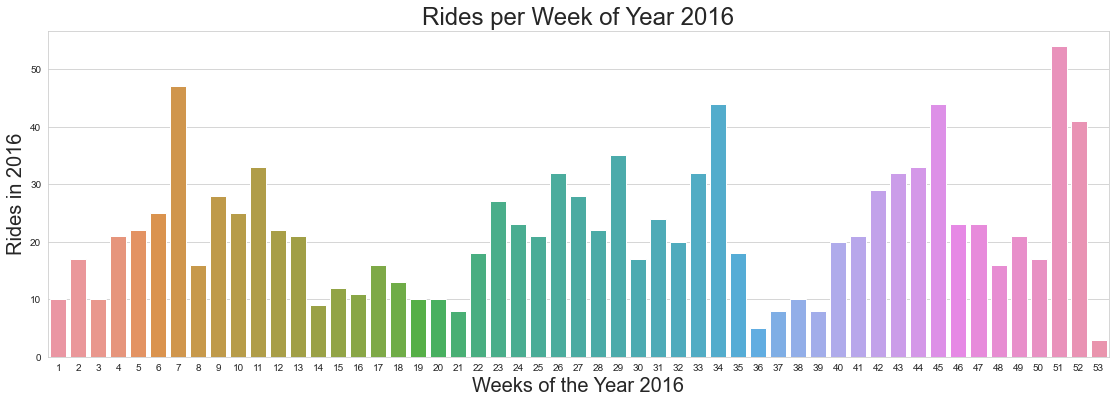

In [51]:
sns.set_style('whitegrid')
plt.subplots(figsize=(19,6))
plt.title("Rides per Week of Year 2016", fontsize=24)
sns.countplot(x="week", data=data)
plt.xlabel("Weeks of the Year 2016", fontsize=20)
plt.ylabel("Rides in 2016", fontsize=20)

Text(0, 0.5, 'Miles')

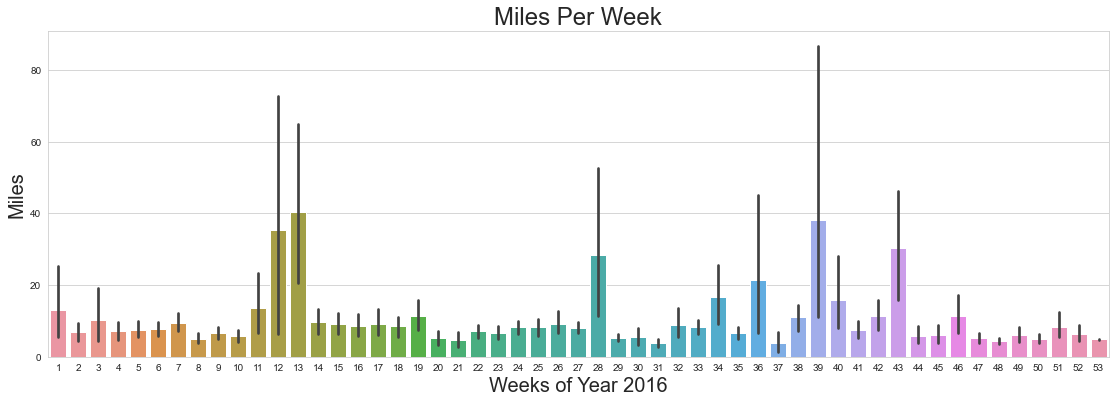

In [52]:
sns.set_style('whitegrid')
plt.subplots(figsize=(19,6))
plt.title("Miles Per Week", fontsize=24)
sns.barplot(x="week", y="miles", data=data)
plt.xlabel("Weeks of Year 2016", fontsize=20)
plt.ylabel("Miles", fontsize=20)

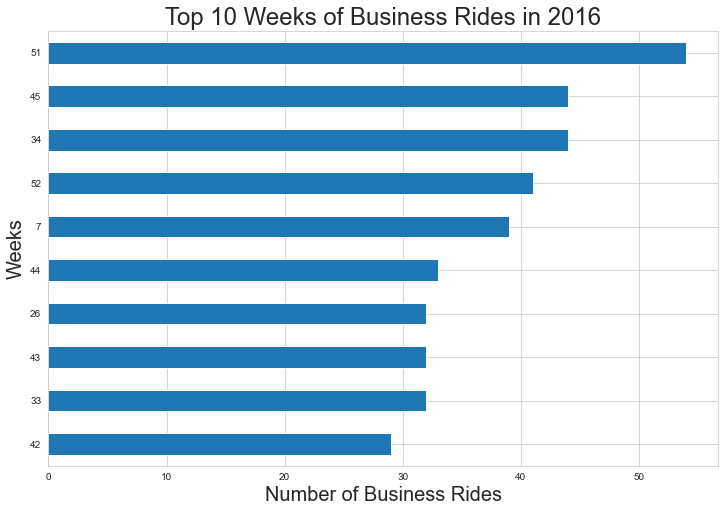

In [53]:
plt.subplots(figsize=(12,8))
data[data["category"]=="Business"]["week"].value_counts()[:10].sort_values().plot.barh()
plt.title("Top 10 Weeks of Business Rides in 2016", fontsize=24)
plt.xlabel("Number of Business Rides", fontsize=20)
plt.ylabel("Weeks", fontsize=20)
plt.show()

Text(0, 0.5, 'Miles')

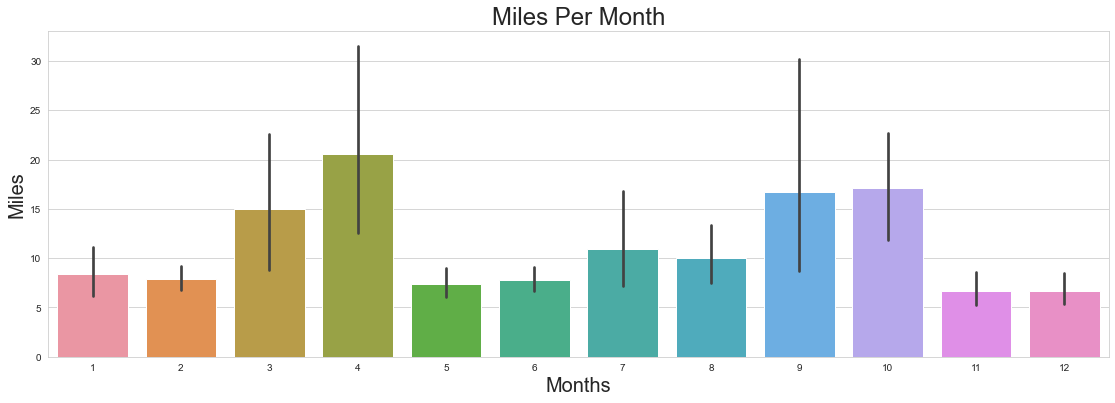

In [54]:
sns.set_style('whitegrid')
plt.subplots(figsize=(19,6))
plt.title("Miles Per Month", fontsize=24)
sns.barplot(x="month", y="miles", data=data)
plt.xlabel("Months", fontsize=20)
plt.ylabel("Miles", fontsize=20)

Text(0, 0.5, 'Months')

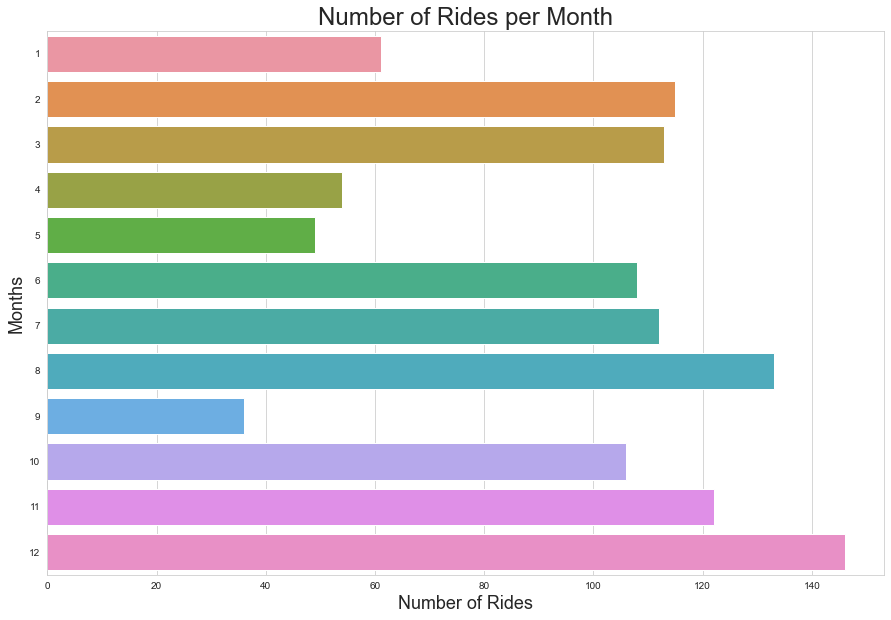

In [55]:
sns.set_style('whitegrid')
plt.subplots(figsize=(15,10))
sns.countplot(y="month", data=data)
plt.title("Number of Rides per Month", fontsize=24)
plt.xlabel("Number of Rides", fontsize=18)
plt.ylabel("Months", fontsize=18)

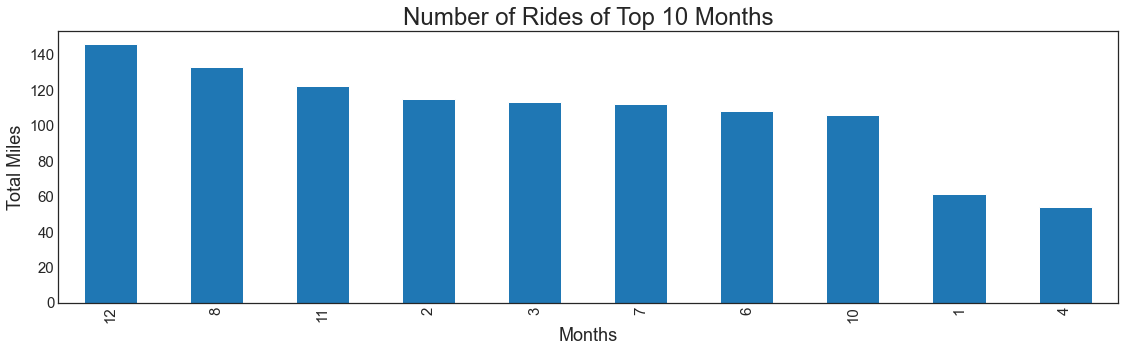

In [56]:
plt.figure(figsize = (19, 5))
plt.style.use('seaborn-white')
data['month'].value_counts().iloc[:10].plot.bar()
plt.title("Number of Rides of Top 10 Months", fontsize=24)
plt.xlabel("Months", fontsize=18)
plt.ylabel("Total Miles", fontsize=18)
plt.tick_params(labelsize=15)

Text(0, 0.5, 'Travel Time')

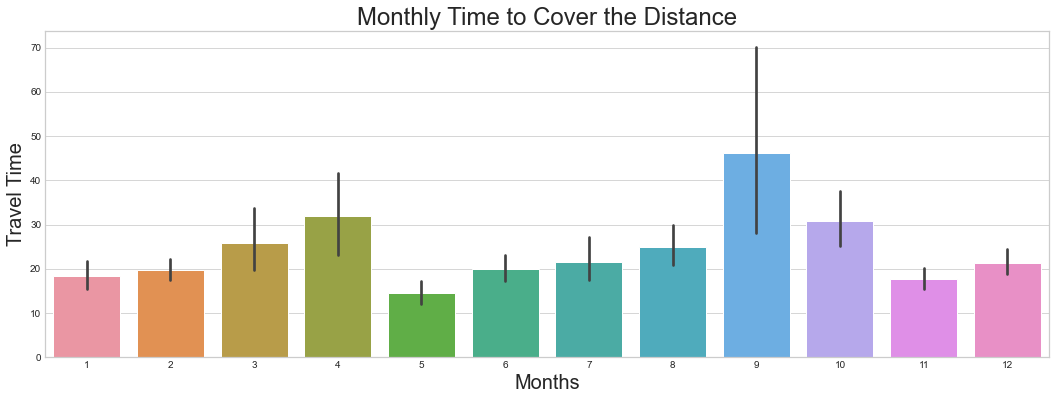

In [57]:
sns.set_style('whitegrid')
plt.subplots(figsize=(18,6))
sns.barplot(x="month", y="minutes", data=data)

plt.title("Monthly Time to Cover the Distance", fontsize=24)
plt.xlabel("Months", fontsize=20)
plt.ylabel("Travel Time", fontsize=20)

Text(0, 0.5, 'Travel Time')

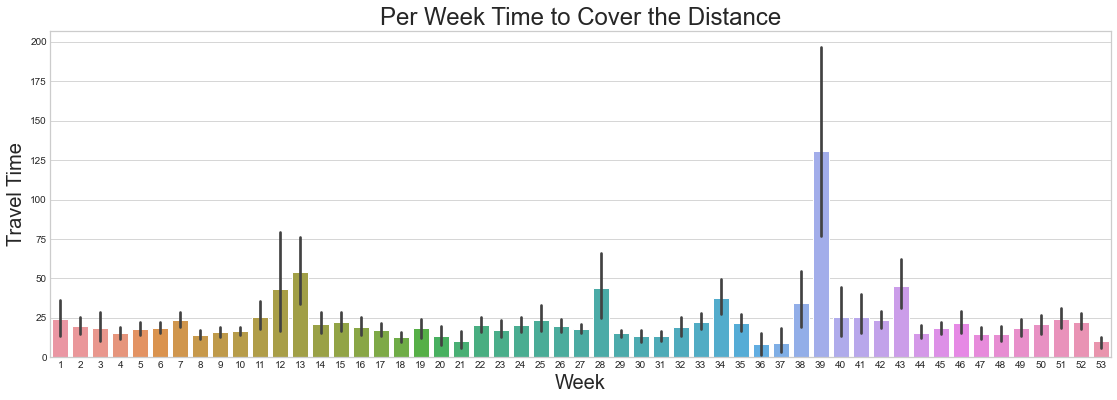

In [58]:
sns.set_style('whitegrid')
plt.subplots(figsize=(19,6))
sns.barplot(x="week", y="minutes", data=data)

plt.title("Per Week Time to Cover the Distance", fontsize=24)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Travel Time", fontsize=20)

Text(0.5, 1.0, 'Comparision between Miles and Minutes(Time)')

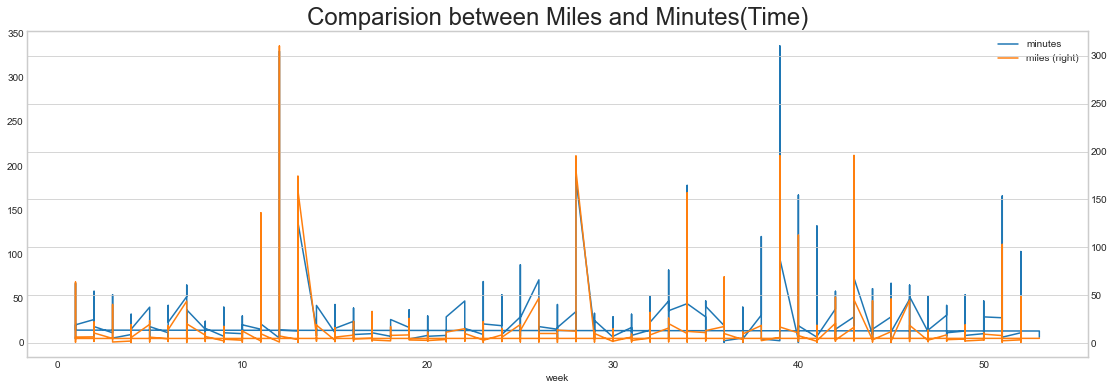

In [59]:
fig, ax = plt.subplots(figsize=(19,6)) # Create the figure and axes object
data.plot(x = 'week', y = 'minutes', ax = ax) # Plot the first x and y axes:
data.plot(x = 'week', y = 'miles', ax = ax, secondary_y = True)
plt.title('Comparision between Miles and Minutes(Time)', fontsize=24)

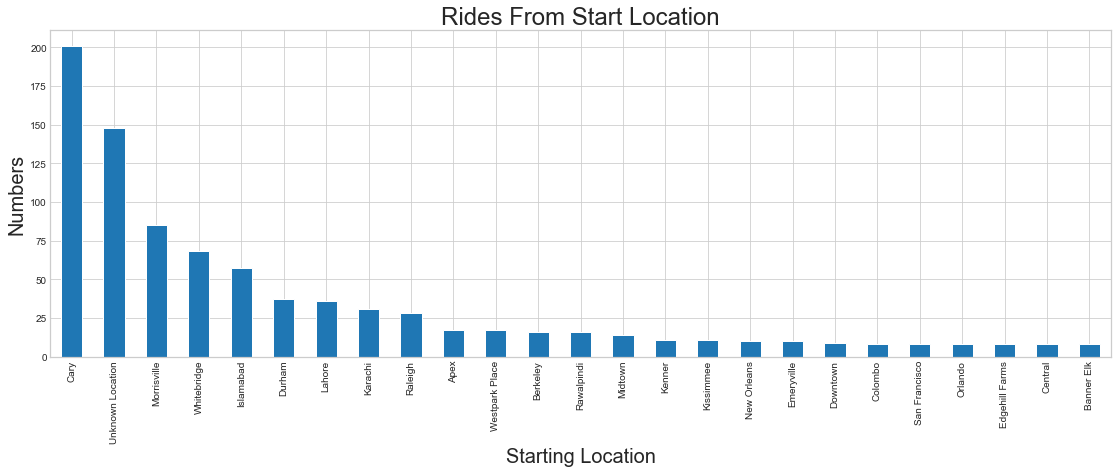

In [60]:
plt.subplots(figsize=(19,6))
data["start"].value_counts()[:25].sort_values(ascending = False).plot.bar()

plt.title("Rides From Start Location", fontsize=24)
plt.xlabel("Starting Location", fontsize=20)
plt.ylabel("Numbers", fontsize=20)
plt.show()

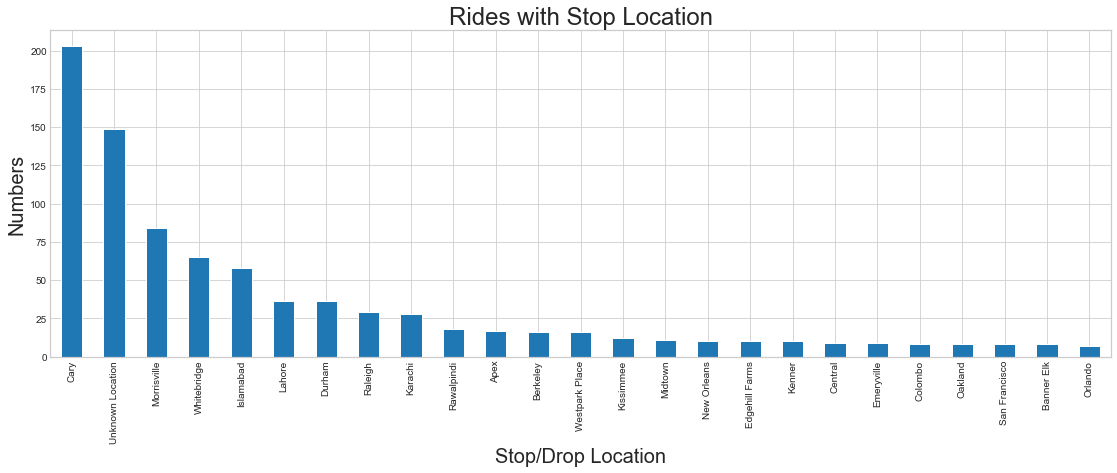

In [61]:
plt.subplots(figsize=(19,6))
data["stop"].value_counts()[:25].sort_values(ascending = False).plot.bar()

plt.title("Rides with Stop Location", fontsize=24)
plt.xlabel("Stop/Drop Location", fontsize=20)
plt.ylabel("Numbers", fontsize=20)
plt.show()

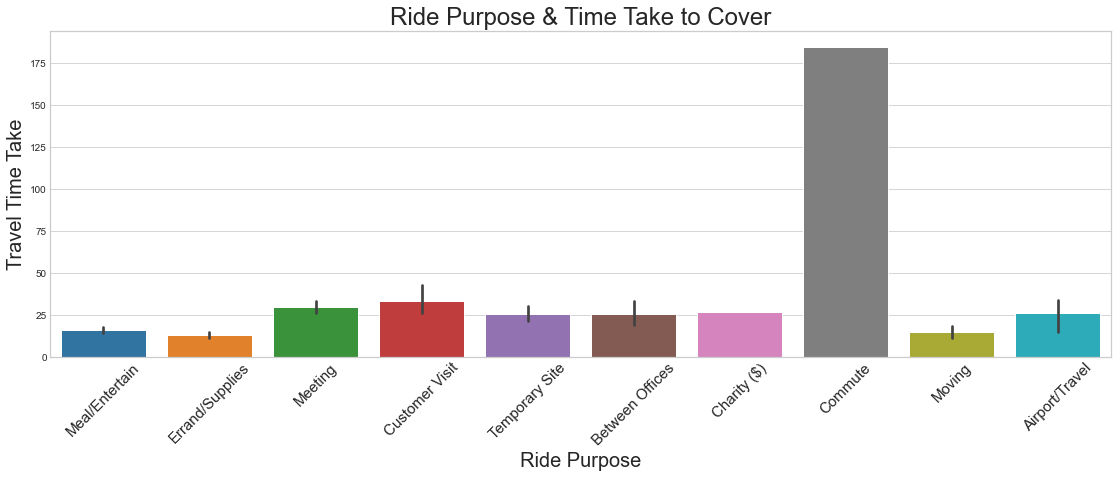

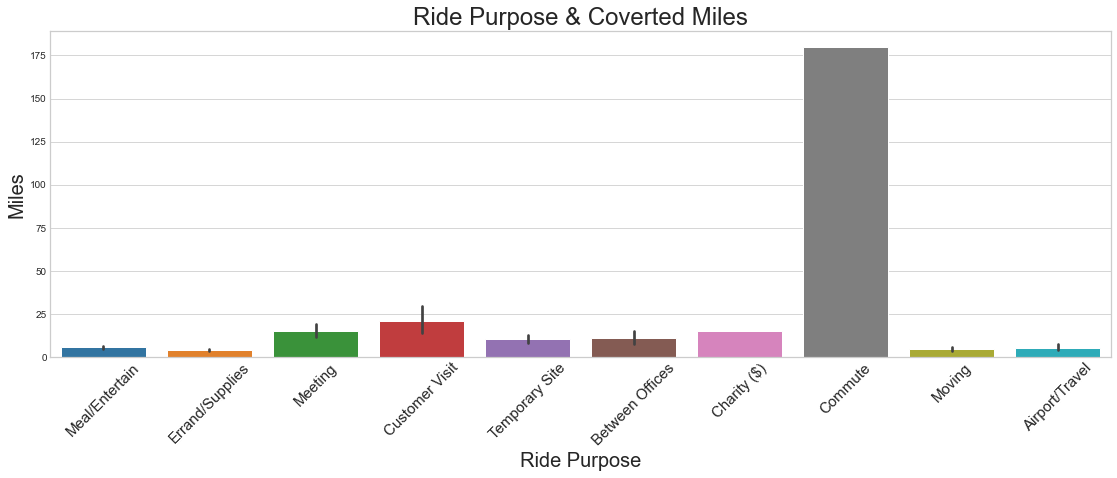

In [62]:
sns.set_style('whitegrid')
plt.subplots(figsize=(19,6))
sns.barplot(x="purpose", y="minutes", data=data)

plt.title("Ride Purpose & Time Take to Cover", fontsize=24)
plt.xlabel("Ride Purpose", fontsize=20)
plt.ylabel("Travel Time Take", fontsize=20)
plt.xticks(rotation = 45, fontsize=15);



plt.subplots(figsize=(19,6))
sns.barplot(x="purpose", y="miles", data=data)

plt.title("Ride Purpose & Coverted Miles", fontsize=24)
plt.xlabel("Ride Purpose", fontsize=20)
plt.ylabel("Miles", fontsize=20)
plt.xticks(rotation = 45, fontsize=15);

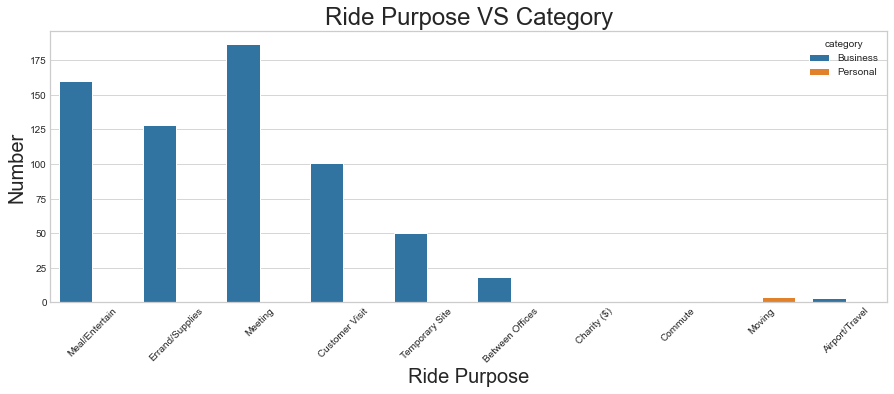

In [63]:
plt.figure(figsize = (15,5))
sns.countplot(data=data, x="purpose", hue="category")

plt.title("Ride Purpose VS Category", fontsize=24)
plt.xlabel("Ride Purpose", fontsize=20)
plt.ylabel("Number", fontsize=20)
plt.xticks(rotation = 45, fontsize=10);

In [68]:
minutes=[]
data['Duration_Minutes'] = data['enddate'] - data['startdate']
data['Duration_Minutes']
for x in data['Duration_Minutes']:
    minutes.append(x.seconds / 60)

data['Duration_Minutes'] = minutes

In [70]:
data['Duration_hours'] = data['Duration_Minutes'] / 60
data['Speed_KM'] = data['miles'] / data['Duration_hours']
data['Speed_KM']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
          ...    
1150     6.000000
1151    13.000000
1152    27.771429
1153    21.333333
1154    28.077670
Name: Speed_KM, Length: 1155, dtype: float64